In [20]:
# importing require modules and libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel("D:python.xlsx")

# Show first 5 rows
print("HEAD (First 5 rows):\n")
print(data.head(),"\n")

# Show last 5 rows
print("\nTAIL (Last 5 rows):\n")
print(data.tail(),"\n")

# General info about dataset
data.info()  


# Gernal Discription Of the DataDet
print("\nDATASET Discription:\n")
print(data.describe() ,"\n")




HEAD (First 5 rows):

  country                state              city  \
0   India  Andaman and Nicobar  Sri Vijaya Puram   
1   India       Andhra_Pradesh         Amaravati   
2   India       Andhra_Pradesh         Amaravati   
3   India       Andhra_Pradesh         Anantapur   
4   India       Andhra_Pradesh         Anantapur   

                                 station         last_update   latitude  \
0  Police Line, Sri Vijaya Puram - ANPCC 2025-04-09 20:00:00  11.654054   
1         Secretariat, Amaravati - APPCB 2025-04-09 20:00:00  16.515083   
2         Secretariat, Amaravati - APPCB 2025-04-09 20:00:00  16.515083   
3           Gulzarpet, Anantapur - APPCB 2025-04-09 20:00:00  14.675886   
4           Gulzarpet, Anantapur - APPCB 2025-04-09 20:00:00  14.675886   

   longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
0  92.734055        OZONE            2.0           46.0           14.0  
1  80.518167        PM2.5           20.0           52.0           35

In [21]:
# Check how many missing values are in each column

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\nMissing values in each column:\n")
print(data.isnull().sum())

# Fill missing values in numeric columns with the average value (mean)
pollutant_min_mean = data['pollutant_min'].mean()
data['pollutant_min'] = data['pollutant_min'].fillna(pollutant_min_mean)

pollutant_max_mean = data['pollutant_max'].mean()
data['pollutant_max'] = data['pollutant_max'].fillna(pollutant_max_mean)

pollutant_avg = data['pollutant_avg'].mean()
data['pollutant_avg'] = data['pollutant_avg'].fillna(pollutant_avg)



# Remove duplicate rows if any are there
data = data.drop_duplicates()




Missing values in each column:

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    132
pollutant_max    132
pollutant_avg    132
dtype: int64


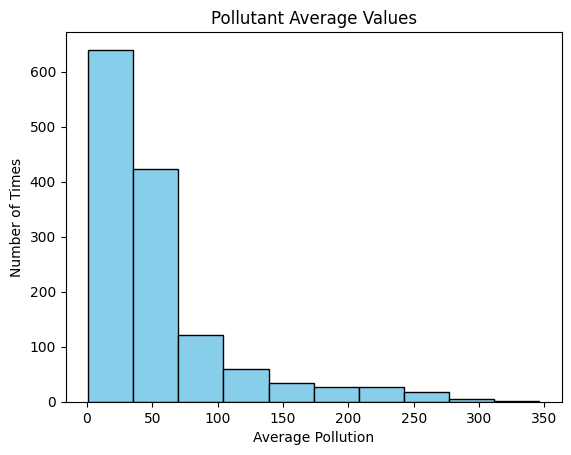

In [22]:
# How average pollution is spread ---- Objective 1.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.hist(data['pollutant_avg'], color='skyblue', edgecolor='black')
plt.title('Pollutant Average Values')
plt.xlabel('Average Pollution')
plt.ylabel('Number of Times')
plt.show()

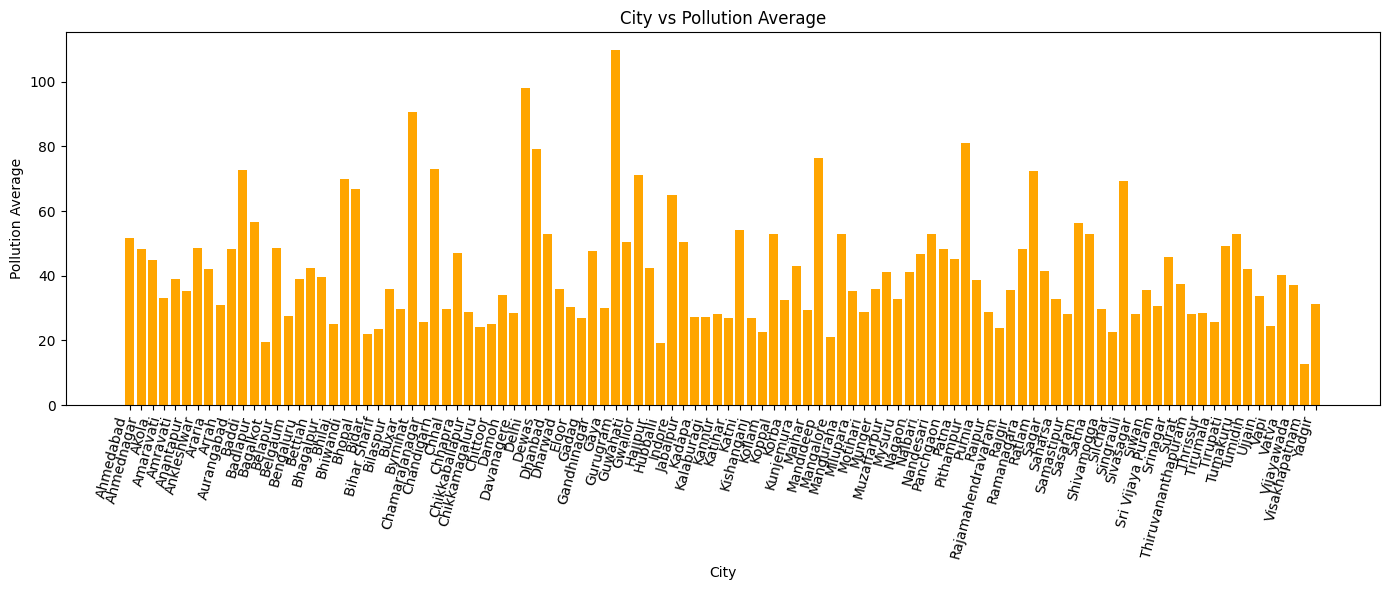

In [23]:
# Average pollution for each city ------ Objective 2.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


city_data = data.groupby('city')['pollutant_avg'].mean()

plt.figure(figsize=(14, 6))  
plt.bar(city_data.index, city_data.values, color='orange')
plt.title('City vs Pollution Average')
plt.xlabel('City')
plt.ylabel('Pollution Average')
plt.xticks(rotation=75, ha='right')  
plt.tight_layout()  
plt.show()


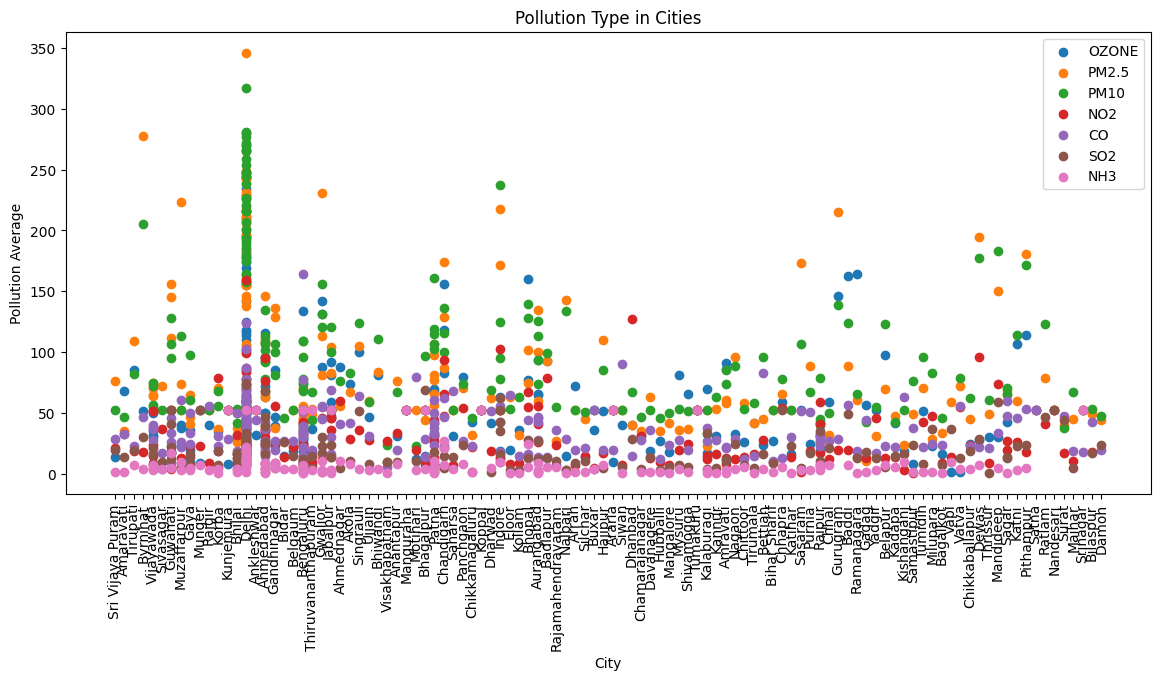

In [24]:
# pollution type in each city ------ Objective 4.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(14, 6))  
for pol_type in data['pollutant_id'].unique():
    pol_data = data[data['pollutant_id'] == pol_type]
    plt.scatter(pol_data['city'], pol_data['pollutant_avg'], label=pol_type)

plt.title('Pollution Type in Cities')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Pollution Average')
plt.legend()
plt.show()

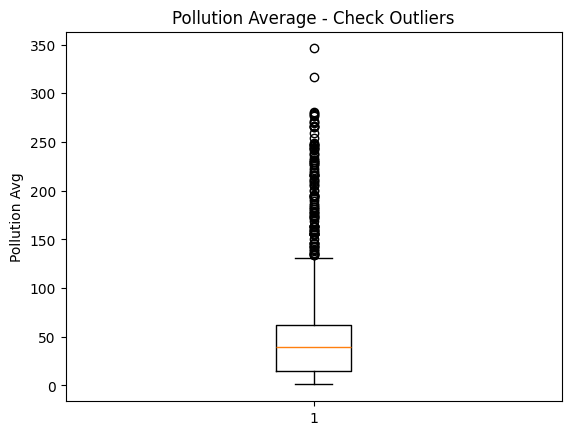

In [25]:
# Check for extreme values --- objective 5.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.boxplot(data['pollutant_avg'])
plt.title('Pollution Average - Check Outliers')
plt.ylabel('Pollution Avg')
plt.show()

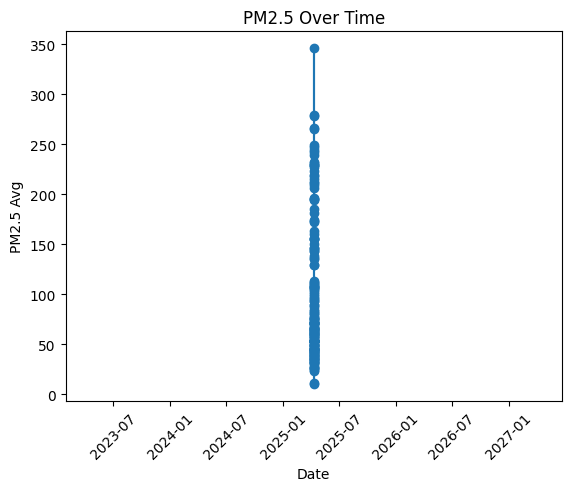

In [26]:
# PM2.5 over time -------Objective 6.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pm_data = data[data['pollutant_id'] == 'PM2.5']
plt.plot(pm_data['last_update'], pm_data['pollutant_avg'], marker='o')
plt.title('PM2.5 Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Avg')
plt.xticks(rotation=45)
plt.show()

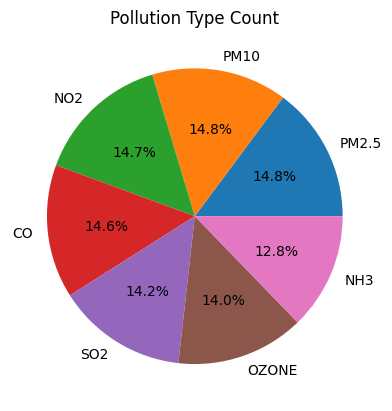

In [27]:
# Count of each pollution type ----- Objective 7.

pollution_type = data['pollutant_id'].value_counts()
plt.pie(pollution_type, labels=pollution_type.index, autopct='%1.1f%%')
plt.title('Pollution Type Count')
plt.show()

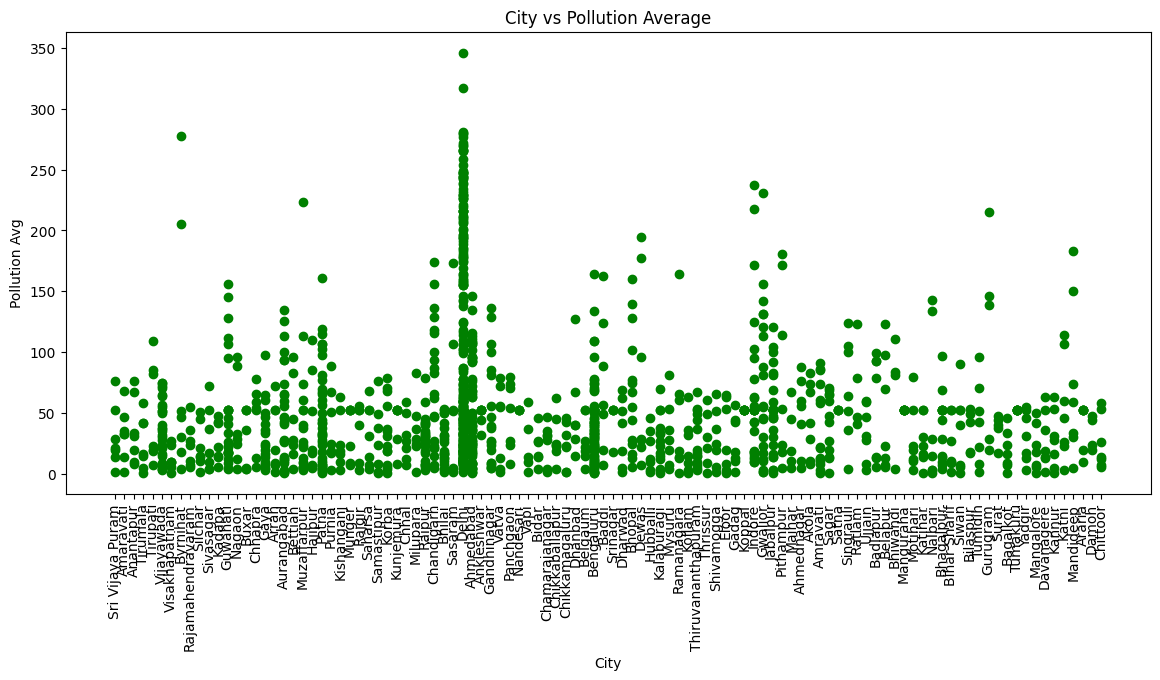

In [28]:
# City vs Pollution Average --- objective 8.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(14, 6))  
plt.scatter(data['city'], data['pollutant_avg'], color='green')
plt.title('City vs Pollution Average')
plt.xlabel('City')
plt.ylabel('Pollution Avg')
plt.xticks(rotation=90)
plt.show()


Summary of Pollution Data:

       pollutant_min  pollutant_max  pollutant_avg
count    1356.000000    1356.000000    1356.000000
mean       27.468137      89.714052      52.830065
std        33.078424      93.839881      55.256762
min         1.000000       1.000000       1.000000
25%         7.000000      23.000000      15.000000
50%        18.000000      66.000000      39.000000
75%        32.000000     107.000000      62.250000
max       251.000000     500.000000     346.000000

How Pollution Values Are Related (Correlation):

               pollutant_min  pollutant_max  pollutant_avg
pollutant_min       1.000000       0.717744       0.835298
pollutant_max       0.717744       1.000000       0.914464
pollutant_avg       0.835298       0.914464       1.000000


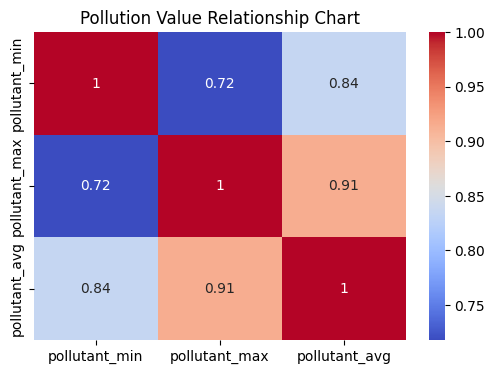

In [29]:
# ------------- Visualize Pollution Relationships --------------------- #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Basic summary stats
print("\nSummary of Pollution Data:\n")
print(data[['pollutant_min', 'pollutant_max', 'pollutant_avg']].describe())

# cheaking weather how each cities pollution related to each other  
print("\nHow Pollution Values Are Related (Correlation):\n")
simple_corr = data[['pollutant_min', 'pollutant_max', 'pollutant_avg']].corr()
print(simple_corr)

# Show it using a colored box chart (heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(simple_corr, annot=True, cmap='coolwarm')
plt.title('Pollution Value Relationship Chart')
plt.show()



📌 Outlier values based on 'pollutant_avg':

             city pollutant_id  pollutant_avg         last_update
11       Byrnihat         PM10          205.0 2025-04-09 20:00:00
34     Aurangabad        PM2.5          135.0 2025-04-09 20:00:00
42    Muzaffarpur        PM2.5          223.0 2025-04-09 20:00:00
76     Chandigarh        PM2.5          174.0 2025-04-09 20:00:00
88          Delhi         PM10          265.0 2025-04-09 20:00:00
...           ...          ...            ...                 ...
1249  Gandhinagar        PM2.5          136.0 2025-04-09 20:00:00
1264     Gurugram        PM2.5          215.0 2025-04-09 20:00:00
1265     Gurugram         PM10          139.0 2025-04-09 20:00:00
1319      Gwalior        PM2.5          231.0 2025-04-09 20:00:00
1328       Indore         PM10          237.0 2025-04-09 20:00:00

[118 rows x 4 columns]


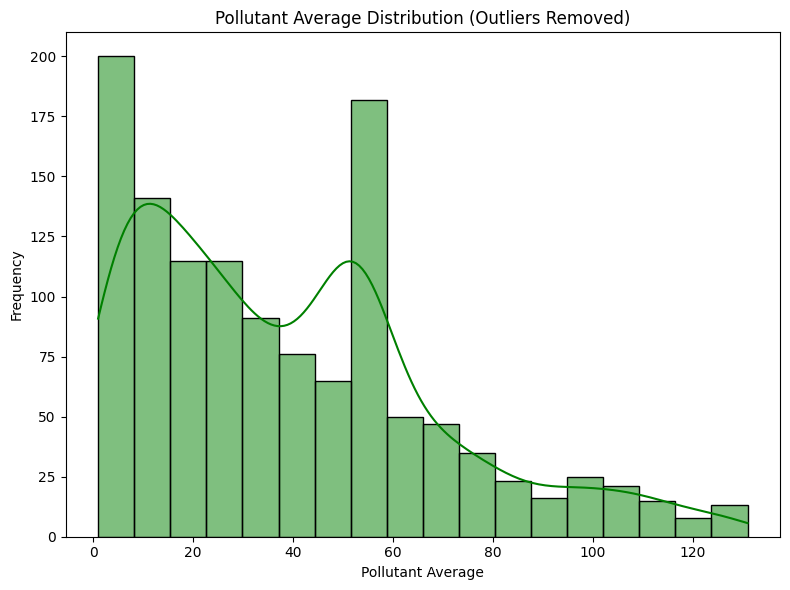

In [30]:
# ------------------- IQR ------------------- #

# Calculate 25th and 75th percentile using NumPy
Q1 = np.percentile(data['pollutant_avg'], 25)
Q3 = np.percentile(data['pollutant_avg'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to get outliers only
outliers = data[(data['pollutant_avg'] < lower_bound) | (data['pollutant_avg'] > upper_bound)]

# Show outlier values
print("\n📌 Outlier values based on 'pollutant_avg':\n")
print(outliers[['city', 'pollutant_id', 'pollutant_avg', 'last_update']])

# Filter data to remove outliers
data_no_outliers = data[(data['pollutant_avg'] >= lower_bound) & (data['pollutant_avg'] <= upper_bound)]

# Plot histogram after removing outliers
plt.figure(figsize=(8, 6))
sns.histplot(data_no_outliers['pollutant_avg'], kde=True, color='green')
plt.title('Pollutant Average Distribution (Outliers Removed)')
plt.xlabel('Pollutant Average')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
